Author: Lijing Wang, lijing52@stanford.edu; David Yin, yinzhen@stanford.edu; Jef Caers, jcaers@stanford.edu (2021)

# Introduction of probability aggregation

Let's start with a simple raining prediction problem: 

**Example 1:** 
- Suppose one meteorologist (source 1) $S_1$ predicts that tomorrow will have probability 0.8 to rain.


- Another meteorologist (source 2) $S_2$ predicts that tomorrow will have probability 0.8 to rain. 

- The historical probability of it raining tomorrow is 0.4. 

How do you aggregate these three different probability? What is now the probability that it rains tomorrow? Can we simply add them up and take average? 

We will learn how to approach these questions in this notebook. 

In geosciences, one common sceanrio is having different sources of information for one system, i.e. $S_1$ borehole information, $S_2$ detailed mapping from geophysical survey, $S_3$ conceptual geological model from experts, etc. So in practice, we need to aggregate them together in order to better understand our system. 





> What is **Probability**? 

Probability $P(A)$ describes how likely an event $A$ is to occur. So in the raining example, the event $A$ is raining tomorrow. The probability $P(A)$ of an event is a number between 0 and 1 (i.e. 0.8, 0.8, 0.4 you saw earlier). If the probability is 0 or 1, we are certain about tomorrow's rain: impossible to rain or definitely rain. 




> What is **conditional probability**? 

Conditional probability is a measure of the probability of an event occurring, given that another event has already occurred. 

For example, in our raining prediction problem, given one meteorologist $S_1$'s belief, the probability of tomorrow rain is 0.8: 
$$P(A|S_1) = 0.8$$





---


Probabilities are somewhat similar to compositions we learned earlier in the class. Recall for compositions, the definition has confined the sample space between 0 and 1 (total sum). We didn't perform classical statistical analysis (mean, variance) directly on compositions. We open the sample space to $(-\infty, + \infty)$ through log-ratios. 

Can we perform similar log-ratios idea on probabilities? And make operations on log-ratios? 

# Log odds ratio

The similar log-ratio idea in probability is called **log odds ratio**.  

Odds ratio is defined as probability of an event happening/probability of an event not happening: 

$$O(A) = \frac{P(A)}{1-P(A)}$$

So if the **odds** ratio is 2, the probability of an event happening is twice the size of the probability of an event not happening. 


Let's take a look on the plot, Probability vs Odds:

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

In [ ]:
P = np.linspace(0,1) # probability
O = P/(1-P) # odds ratio

Text(0.5, 1.0, 'Probability vs Odds')

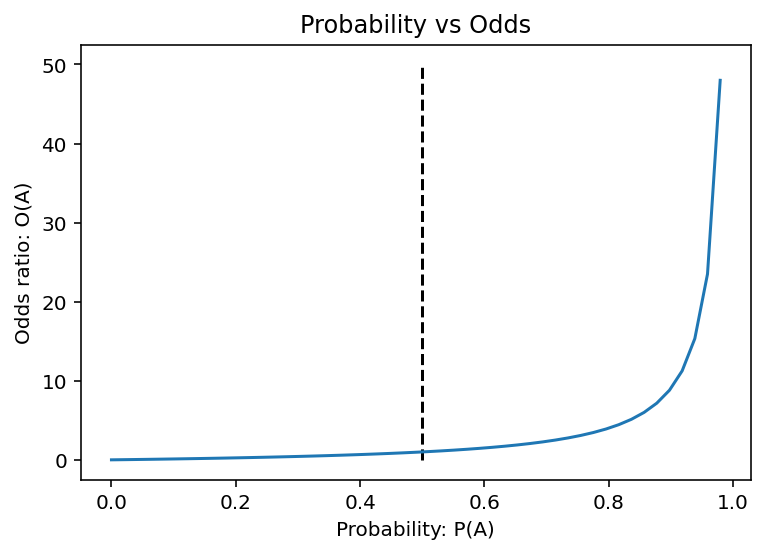

In [ ]:
plt.plot(P,O)
plt.xlabel('Probability: P(A)')
plt.ylabel('Odds ratio: O(A)')
plt.vlines(x = 0.5, ymin = 0, ymax = 50, linestyles='--')
plt.title('Probability vs Odds')

We can also take the logarithm of odds ratio: log odds ratio. The log odds ratio also known as the logit: 

$$r(A) = \text{logit}(A) = \log(\frac{P(A)}{1-P(A)})$$

This log odds ratio is symmetric around 0, where $P(A)$ = 0.5 .  

$$P(A) = 0, O(A) = 0, \text{logit}(A) = -\infty$$
$$P(A) = 0.5, O(A) = 1,\text{logit}(A) = 0$$
$$P(A) = 1, O(A) = \infty,\text{logit}(A) = \infty$$

In [ ]:
r = np.log(O)

Text(0.5, 1.0, 'Probability vs log odds ratio')

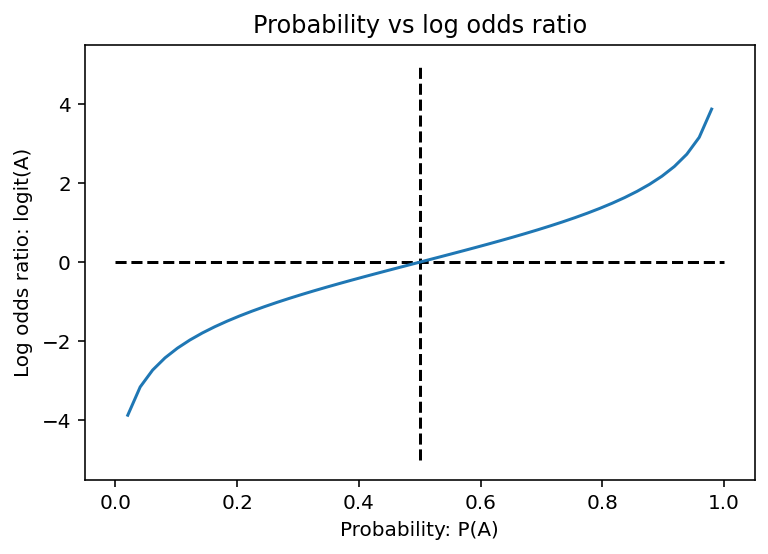

In [ ]:
plt.plot(P,r)
plt.xlabel('Probability: P(A)')
plt.ylabel('Log odds ratio: logit(A)')
plt.vlines(x = 0.5, ymin = -5, ymax = 5, linestyles='--')
plt.hlines(y = 0, xmin = 0, xmax = 1, linestyles='--')
plt.title('Probability vs log odds ratio')

## Summing log odds ratio

After we take log odds ratio, we again open the probability space from (0,1) to $(-\infty, \infty)$. Can we add log-odds ratio directly to perform probability aggregation?



**Example 2:** 

Suppose we have $5\%$ chance of finding a diamond in one investigation site. We also have a diamond detector. This diamond detector beeps with the probability $50\%$ when there is a diamond (or diamonds) in this location. It also has the false alarm: it beeps with the probability $25\%$ when there is no diamond in this location. 

Question: what is the probability of having a diamond in this location if the detector beeps? 



Let's formulate our question in the mathematical terms:

$A$ is the event of this site contains a diamond. $B$ is the event of this diamond detector beeps. 

Then: 
$$P(A) = 0.05$$
$$P(B|A) = 0.5$$
$$P(B|\neg A) = 0.25$$

Here $\neg A$ is the event of this site does **not** contain a diamond. 
$$P(\neg A) = 1-P(A)$$

Our question is to derive $P(A|B)$.

Using what we defined earlier in this notebook: 

$$O(A) = \frac{P(A)}{1-P(A)} = \frac{P(A)}{P(\neg A)}$$

$$O(A|B) = \frac{P(A|B)}{1-P(A|B)} = \frac{P(A|B)}{P(\neg A|B)}$$

$$O(A|B) =\frac{P(A|B)}{P(\neg A|B)} =  \frac{P(B|A)P(A)/P(B)}{P(B|\neg A)P(\neg A)/P(B)} = O(A)\frac{P(B|A)}{P(B|\neg A)}$$




$$\text{logit}(A|B) = \text{logit}(A)+ \log(\frac{P(B|A)}{P(B|\neg A)})$$

Therefore, we can perform summation of these log ratios (logits): 

In [ ]:
def odds_ratio(x):
    return x/(1-x)

def logit(x):
    return np.log(x/(1-x))

In [ ]:
P_A = 0.05
P_B_cond_A = 0.5
P_B_cond_negA= 0.25

In [ ]:
# logit(A)

logit(P_A) 

-2.9444389791664403

In [ ]:
# log(P(B|A)/P(B|\neg A))

np.log(P_B_cond_A/P_B_cond_negA) 

0.6931471805599453

In [ ]:
# logit(A|B)
logit_P_A_cond_B = logit(P_A) + np.log(P_B_cond_A/P_B_cond_negA)
logit_P_A_cond_B 

-2.251291798606495

We can also transfer back this log-ratio/logit to the probability: 

$$\text{logit}(A) = \log(\frac{P(A)}{1-P(A)})$$
$$P(A) = \frac{1}{1+\exp(-\text{logit}(A))}$$

In [ ]:
def inverse_logit(x):
    return (1/(1+np.exp(-x)))

In [ ]:
# P(A|B)
inverse_logit(logit_P_A_cond_B)

0.09523809523809527

Therefore, if the detector beeps, the probability of having a diamond in this location is $9.5\%$. This result will be impossible to be calculated if we do operation directly on the probability, without log-ratio transformation. Same as we learned for the compositional data. 


Reference: https://www.lesswrong.com/tag/log-odds 

# Conditional independence



$S_1$ and $S_2$ are **conditionally independent** given $A$ if and only if, given knowledge that $A$ occurs, knowledge of whether $S_1$ occurs provides no information on the likelihood of $S_2$ occurring, and knowledge of whether $S_2$ occurs provides no information on the likelihood of $S_1$ occurring:

$$P(S_1,S_2|A) = P(S_1|A)*P(S_2|A)$$

In example 1: 

Meterologist $S_1$'s prediction and Meterologist $S_2$'s prediction are conditional independent given the rain status of tomorrow $A$. In other words, these two meterologists are using completely different datasets to make their predictions. 


# Aggregation of probabilities with log odds ratio






Now it is the time to learn the probability aggregation, with the help of **log odds ratio** and **conditional independence**. 


The assumption for this probability aggregation we learned here is conditional independence: the information source $S_1, S_2, S_3, ..., S_n$ are all conditional independent given the event $A$:

$$P(S_1,S_2|A) = P(S_1|A)*P(S_2|A)$$

Let's also formulate Example 1 in mathematical terms: 
$$P(A|S_1) = 0.8$$
$$P(A|S_2) = 0.8$$
$$P(A) = 0.4$$

If the assumption, conditional indpendence is satisfied, then the extra information provides from $S_1$ and $S_2$ are independent. This extra information means the additive information provided from the information source ($S_1$ or $S_2$) relative to the prior knowledge $P(A) = 0.4$. 

How do we define the "information"? Recall we can simply do the summation operation on the log odds ratio and calculate new log odds ratio. So it is intuitive to define the log odds ratio as the representative of the information. 





Then the extra information provided from the information source $S_1$ is: 

$$r_1-r = \log(\frac{P(A|S_1)}{1-P(A|S_1)})-\log(\frac{P(A)}{1-P(A)})$$


from the information source $S_2$ is: 
$$r_2-r = \log(\frac{P(A|S_2)}{1-P(A|S_2)})-\log(\frac{P(A)}{1-P(A)})$$

The target for the Example 1 is $P(A|S_1,S_2)$, the probability after we know all information source. 

Let's denote $r_x$ is the log odds ratio of $P(A|S_1,S_2)$. 

Then the extra information between the posterior $P(A|S_1,S_2)$ and the prior $P(A)$ is the summation of the extra information of these two sources,
$$r_x-r = (r_1-r)+(r_2-r)$$

$$r_x = r_1+r_2-r$$

$r_1, r_2, r$ are all known to us. 

We can then calculate $r_x$ and transfer back this logit to the probability $P(A|S_1,S_2)$

In [ ]:
P_A_cond_S1 = 0.8
P_A_cond_S2 = 0.8
P_A = 0.4

In [ ]:
# r_1
logit(P_A_cond_S1)

1.3862943611198908

In [ ]:
# r_2
logit(P_A_cond_S2)

1.3862943611198908

In [ ]:
# r
logit(P_A)

-0.4054651081081643

In [ ]:
# r_x
r_x = logit(P_A_cond_S1)+logit(P_A_cond_S2)-logit(P_A)
r_x

3.1780538303479458

In [ ]:
# P(A|S1,S2)
inverse_logit(r_x)

0.96

After the probability aggregation, the probability of raining tomorrow is 96%, which is higher than 80%. 

That makes sense because two meterologists using different information sources both believe that the probability of raining tomorrow is high. Therefore if we aggregate them together, the aggregated probability will be much higher than 80%. 

Note that if anyone believes the probability $P(A|S_i)$ is 0 or 1, no matter what other's beliefs are, we will be certain about $P(A|S_1,S_2,..., S_n)$: 0 or 1. The logit of probability 0 and 1 are $-\infty$ and $\infty$.

## Extension




> Different weight on different information sources: 

$$r_x-r = \omega_1(r_1-r)+\omega_2(r_2-r)$$

> Multiple ($n$) information sources with the same weight = 1: 

$$r_x-r = (r_1-r)+(r_2-r) + ... + (r_n-r)$$

In [ ]:
# perform probability aggregation with conditional independence assumption

def prob_aggregation(source, prior = None, weight = None):
    # source: num_source x num_sample array, if you have only one event, num_sample = 1
    #         each value in source matrix is probability P(A|S_i)
    # prior: 1 x num_sample array, each value represents probability P(A)
    # weight: num_source x 1 array, the weight for each information source w(S_i). 0 <= w(S_i) <= 1
    
    num_source, num_sample = source.shape

    if prior is None: 
        prior = np.zeros((1, num_sample)) + 0.5

    if weight is None: 
        weight = np.zeros((num_source, 1)) + 1

    # logit(A|S_i)
    logit_source = logit(source) 

    # logit(A)
    logit_prior = logit(prior) 

    # logit(A|S_1,S_2,...,S_n)
    logit_posterior = np.sum((logit_source-logit_prior)*weight, axis = 0) + logit_prior 
    
    # P(A|S_1,S_2,...,S_n)
    posterior = inverse_logit(logit_posterior)

    return posterior

Extension on the rain example 1: 

Location $A_1$: 
- Suppose one meteorologist (source 1) $S_1$ predicts that tomorrow will have probability 0.8 to rain. 


- Another meteorologist (source 2) $S_2$ predicts that tomorrow will have probability 0.8 to rain. 

- Lijing $S_3$ predicts that tomorrow will have probability 0.2 to rain. She is not a meteorologist therefore we have lower weights for her prediction: 0.1. 

- The historical probability of it raining tomorrow is 0.4. 

Location $A_2$: 
- Suppose one meteorologist (source 1) $S_1$ predicts that tomorrow will have probability 0.2 to rain. 


- Another meteorologist (source 2) $S_2$ predicts that tomorrow will have probability 0.2 to rain. 

- Lijing $S_3$ predicts that tomorrow will have probability 0.1 to rain. She is not a meteorologist therefore we have lower weights for her prediction: 0.1. 

- The historical probability of it raining tomorrow is 0.4. 


Question: what is the probability of raining tomorrow at $A_1$ and $A_2$? 

In [ ]:
num_source = 3 # S_1, S_2, S_3
num_sample = 2 # A_1, A_2

source = np.array([[0.8,0.8,0.2],
                   [0.2,0.2,0.1]]).T.reshape(num_source,num_sample) 

prior =  np.array([0.4,0.4]).reshape(1,num_sample)
weight = np.array([1,1,0.1]).reshape(num_source,1)

prob_aggregation(source, prior, weight)

array([[0.95605896, 0.07267548]])

The probability of raining tomorrow at location $A_1$ is 95.6%.  Notice here we have an extra, not reliable source $S_3$. This source has not changed a lot on the aggregated probability, because of the lower weight. 


The probability of raining tomorrow at location $A_2$ is 0.07%. 

So we have dealt with two locations. How about multiple locations, like many locations on the map? 

# Aggregate of spatial probability

Let's aggregate these two probabilty maps provided from two different sources. We assume $P(A|S_1),P(A|S_2)$ are all conditional independent. 

Here the prior probability for $A$ is 
$P(A) = 0.35$. 



In [ ]:
## Clone data from our GitHub repository
! git clone https://github.com/lijingwang/GEOLSCI6_EARTHSYS100A.git

Cloning into 'GEOLSCI6_EARTHSYS100A'...
remote: Enumerating objects: 174, done.
remote: Counting objects: 100% (174/174), done.
remote: Compressing objects: 100% (158/158), done.
remote: Total 174 (delta 72), reused 36 (delta 10), pack-reused 0
Receiving objects: 100% (174/174), 1.48 MiB | 3.37 MiB/s, done.
Resolving deltas: 100% (72/72), done.


Two probability maps from different sources:

In [ ]:
prob_map1 = np.loadtxt('/content/GEOLSCI6_EARTHSYS100A/SpatialAggregation/ProbabilityAggregation/map1.txt')
prob_map2 = np.loadtxt('/content/GEOLSCI6_EARTHSYS100A/SpatialAggregation/ProbabilityAggregation/map2.txt')

Text(0.5, 1.0, 'Prob map 2: P(A|S2)')

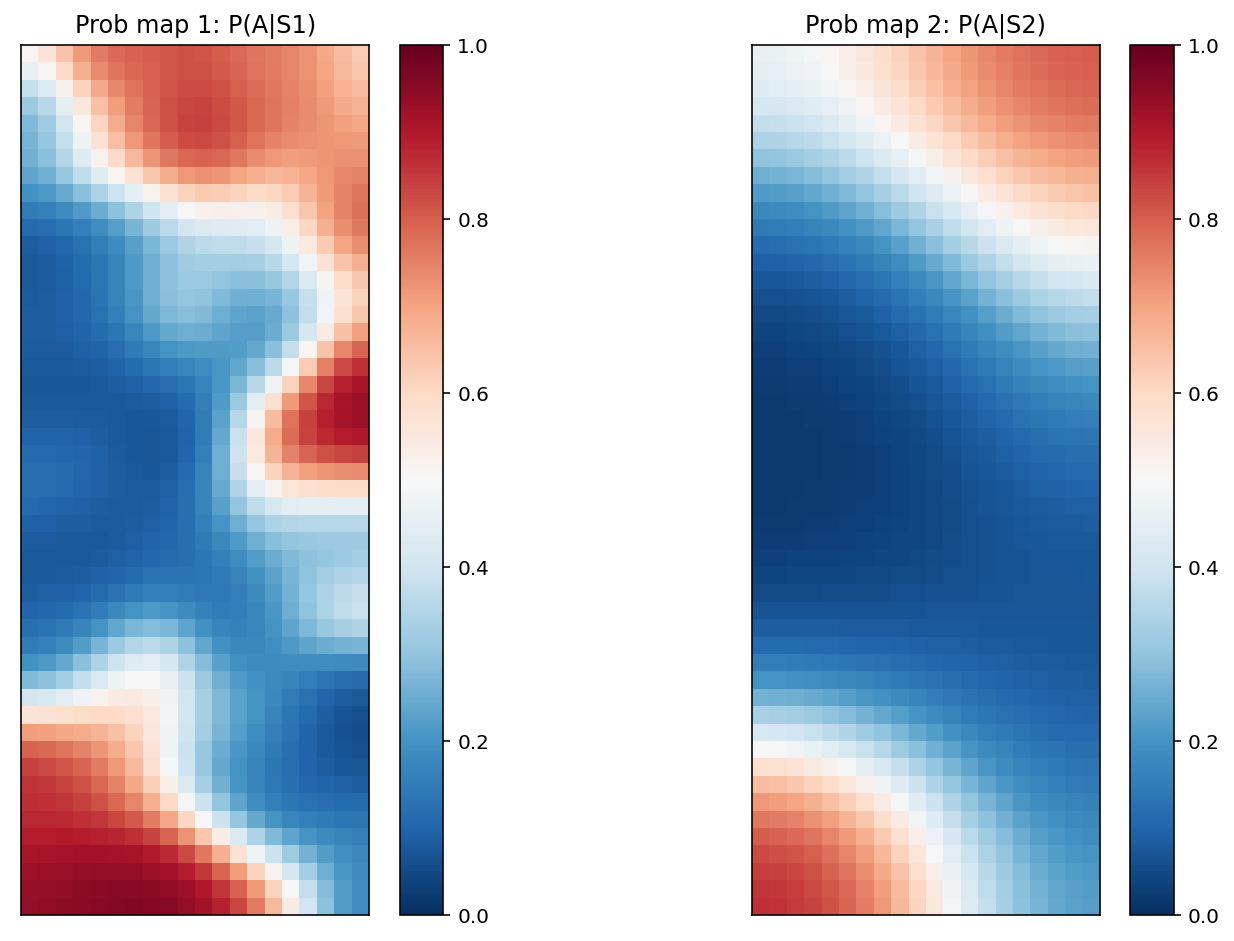

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,8))

plot1 = ax1.imshow(prob_map1,vmin = 0, vmax = 1, cmap = 'RdBu_r')
plt.colorbar(plot1,ax=ax1)
ax1.set_title('Prob map 1: P(A|S1)')
ax1.set_xticks([])
ax1.set_yticks([])

plot2 = ax2.imshow(prob_map2,vmin = 0, vmax = 1, cmap = 'RdBu_r')
plt.colorbar(plot2,ax=ax2)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('Prob map 2: P(A|S2)')


Aggregate two maps use log odd ratios: 

In [ ]:
num_source = 2 # S_1, S_2
num_sample = prob_map1.reshape(-1).shape[0] # A_1, A_2, ..., A_1000

source = np.array([prob_map1.reshape(-1),
                   prob_map2.reshape(-1)])

prior =  np.array(np.zeros(num_sample)+0.35).reshape(1,num_sample) # prior probability is 0.35
weight = np.array([1,1]).reshape(num_source,1) # same weight for two maps

aggregated_map = prob_aggregation(source, prior, weight).reshape(prob_map1.shape)

Text(0.5, 1.0, 'Aggregated map: P(A|S1,S2)')

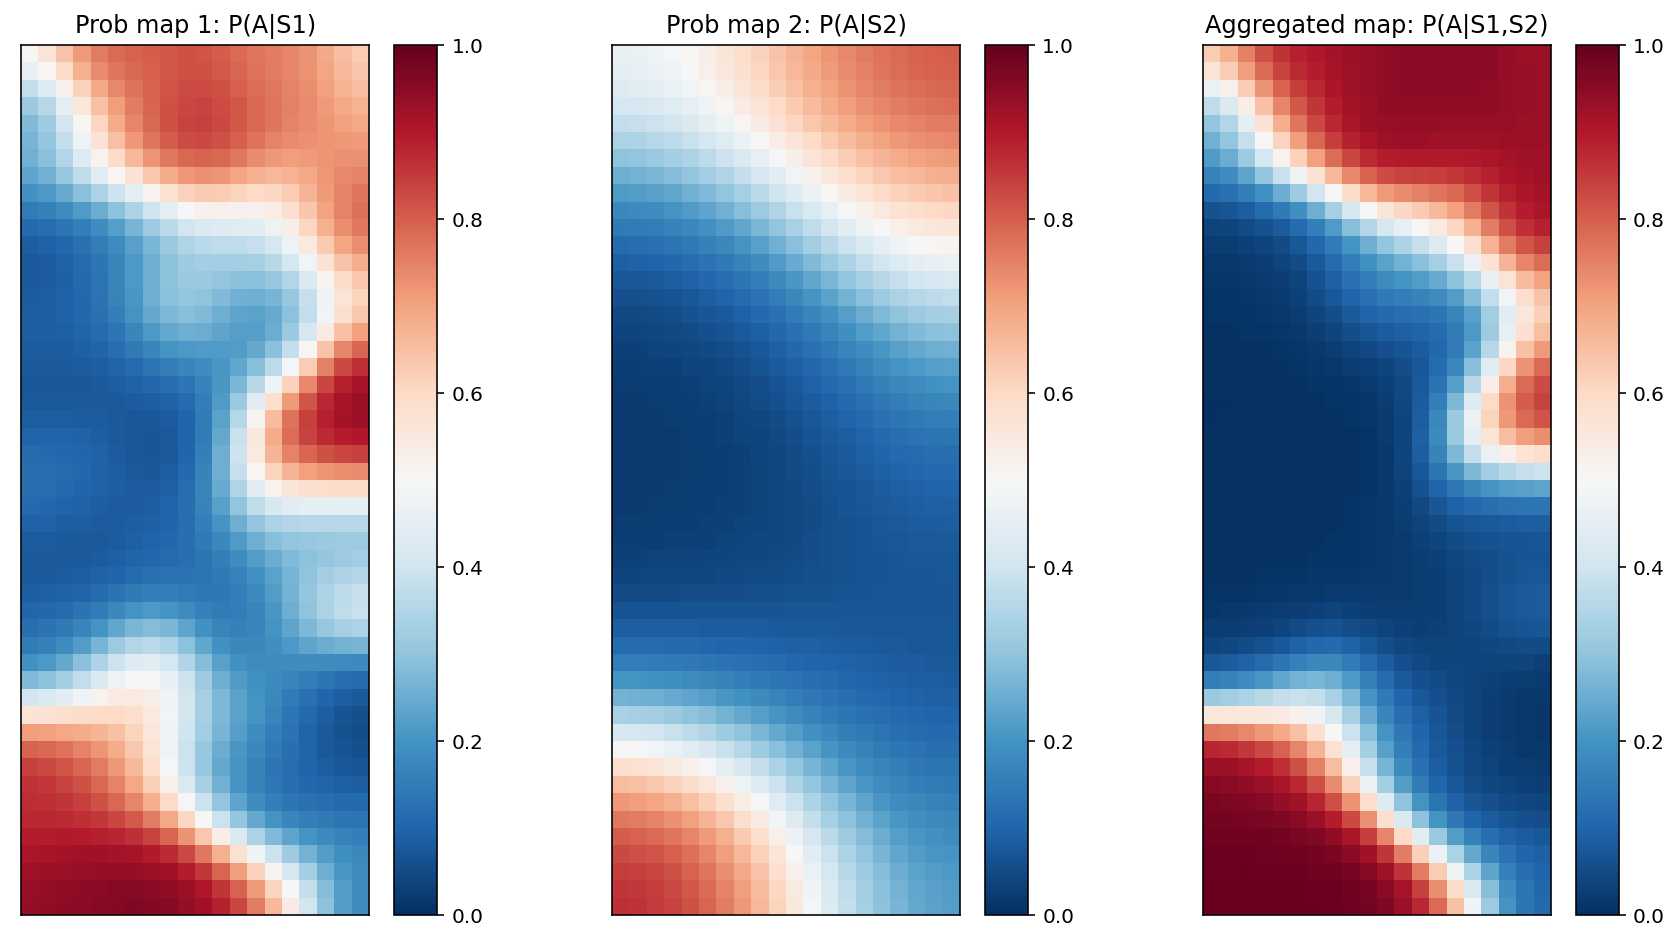

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15,8))

plot1 = ax1.imshow(prob_map1,vmin = 0, vmax = 1, cmap = 'RdBu_r')
plt.colorbar(plot1,ax=ax1)
ax1.set_title('Prob map 1: P(A|S1)')
ax1.set_xticks([])
ax1.set_yticks([])

plot2 = ax2.imshow(prob_map2,vmin = 0, vmax = 1, cmap = 'RdBu_r')
plt.colorbar(plot2,ax=ax2)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('Prob map 2: P(A|S2)')


plot3 = ax3.imshow(aggregated_map,vmin = 0, vmax = 1, cmap = 'RdBu_r')
plt.colorbar(plot3,ax=ax3)
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_title('Aggregated map: P(A|S1,S2)')
